# Statistical Machine Learning AM41ML

## Week 2 Advanced Model Selection

# The objective of this second lab is to get familiarized with the BIC.

## Task 1 a
Construct your own artificial dataset. The data to be consider has the following form:
$$
y_n=g(x_n)+\varepsilon_n,
$$
where $x_n$ is the independent variable or feature, $y_n$ is the dependent variable, target or label, $\varepsilon$ represents the added noise to the model (that has been drawn from a Normal Distribution with zero mean and $\sigma^2$ variance) and $g(\cdot)$ is the true generating function.

Construct a data set formed by $N=11$ ordered pairs $(x_n,y_n)$, where $x_n=\frac{n}{10},$ for all $n=0,1,\dots,10$, $g(x)=x+1.5 \sin(2\pi x)$ and $\varepsilon\sim\mathcal{N}(\varepsilon|0,0.04)$, i.e. a Gaussian deviate with zero mean and 0.04 variance.

Hint: Use the library NumPy https://numpy.org/

## Task 1 b

Make a plot y vs x of the data set

Hint: Use the library PyPlot https://matplotlib.org/


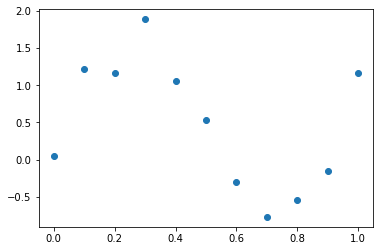

In [2]:
################
### Task 1 a ###
################

import numpy as np                        # Imports NumPy
def data(eps):                            # Function data(eps) constructs a data set with the adition of a Gaussian noise with std eps
    ee = np.random.normal(0, eps, 11)     # Noise array
    x  = np.arange(0,1.01,.1)             # Independent variable array
    y  = x + 1.5 * np.sin(2*np.pi*x) + ee # Dependent variable y = g(x) + Gaussian noise array
    return(x,y)                           # The function returns two arrays of dim 11. Independent and dependent variables respectively

x1 , y1 = data(0.2)                       # A data set must be created and kept in order to compute the polynomials

################
### Task 1 b ###
################

import matplotlib.pyplot as plt           # Imports PyPlot          
plt.scatter(x1,y1)                        # Simplest possible scatter points plot y vs x (Feel free to improve this plot)
plt.show()                                # Show


## Task 2 a
Compute the best fit polynomial of order $L=1,\,2,\,\dots,8$, that minimizes the sum-of-square error for your artificial dataset.
## Task 2 b
Plot each one of the polynomials and the data points in the same plot.

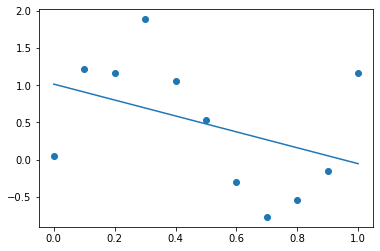

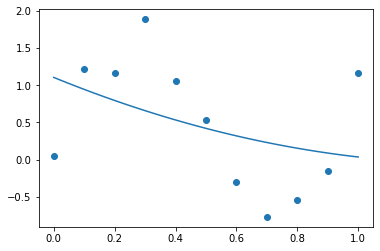

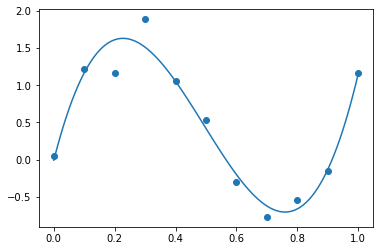

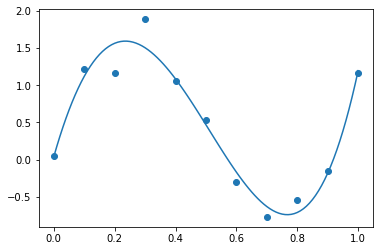

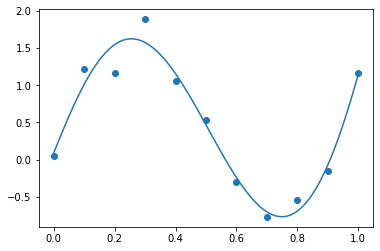

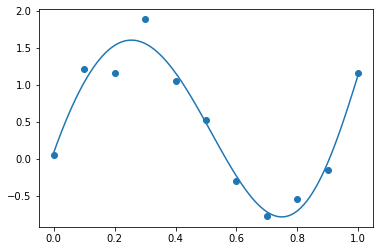

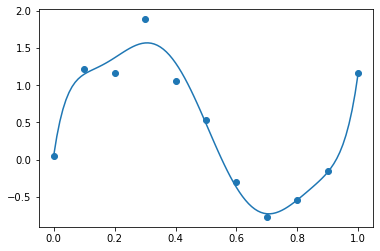

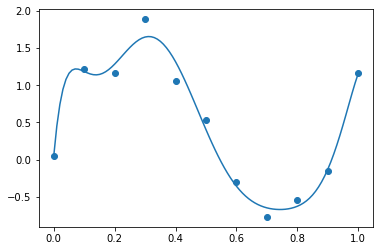

In [10]:
################
### Task 2 a ###
################

def bfpC(L):                                                 # Function bfpc(L) construct the least-square polynomial of O(L) given the data set {x1,y1}
    
    tt   = np.zeros(L + 1)                                   # Definition of the array tt with averages yx^i
    AA   = np.zeros((L + 1,L + 1))                           # Definition of the matrix AA with averages x^i
    
    for i in range(0,L + 1):                                 # Loop in rows
        for j in range(i,L + 1):                             # Loop in columns
            for n in range(0,11):                            # Loop in data elements to compute the averages
                AA[i][j] = AA[i][j] + x1[n] ** (i + j) / 11  # Averages
            AA[j][i] = AA[i][j]                              # The matrix is symmetric therefore only half of the elements are computed
    
    for i in range(0,L + 1):                                 # Loop in rows
        for n in range(0,11):                                # Loop in data elements
            tt[i] = tt[i] + y1[n] * x1[n] ** i / 11          # Averages
            
    AI = np.linalg.inv(AA)                                   # Computation of the inverse matrix
    coef = AI.dot(tt)                                        # Computation of the solution A^(-1) t
    return(coef)                                             # Returns an array with the coeficients of the polynomial of order L

C01 = bfpC(1)                                                # Coeficients for the polynomial of order 1
C02 = bfpC(2)                                                # Coeficients for the polynomial of order 2
C03 = bfpC(3)                                                # Coeficients for the polynomial of order 3
C04 = bfpC(4)                                                # Coeficients for the polynomial of order 4
C05 = bfpC(5)                                                # Coeficients for the polynomial of order 5
C06 = bfpC(6)                                                # Coeficients for the polynomial of order 6
C07 = bfpC(7)                                                # Coeficients for the polynomial of order 7
C08 = bfpC(8)                                                # Coeficients for the polynomial of order 8

################
### Task 2 b ###
################

def bfpP(coef,x):                                            # Function bfpP(coef,x) computes P(x)=coef(0)+coef(1)*x+...+coef(L)*x**L
    z = 0                                                    # z stores the evaluation of the polynomial
    l = 0                                                    # l is the order of the term
    for c in coef:                                           # Loop in coeficients
        z = z + c * x ** l                                   # Computation of the terms of the polynomial
        l = l + 1                                            # Increment in the order of the terms
    return(z)                                                # Returns the evaluation of the polynomial at x

X   = np.arange(0,1.01,.01)                                  # Suitable abscisas for the plots
Y01 = bfpP(C01,X)                                            # Array with the values of the polynomial of order 1
Y02 = bfpP(C02,X)                                            # Array with the values of the polynomial of order 2
Y03 = bfpP(C03,X)                                            # Array with the values of the polynomial of order 3
Y04 = bfpP(C04,X)                                            # Array with the values of the polynomial of order 4
Y05 = bfpP(C05,X)                                            # Array with the values of the polynomial of order 5
Y06 = bfpP(C06,X)                                            # Array with the values of the polynomial of order 6
Y07 = bfpP(C07,X)                                            # Array with the values of the polynomial of order 7
Y08 = bfpP(C08,X)                                            # Array with the values of the polynomial of order 8

plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 1
plt.plot(X,Y01)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 2   
plt.plot(X,Y02)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 3   
plt.plot(X,Y03)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 4   
plt.plot(X,Y04)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 5   
plt.plot(X,Y05)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 6   
plt.plot(X,Y06)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 7   
plt.plot(X,Y07)
plt.show()
plt.scatter(x1,y1)                                           # Scattered points and polynomial of order 8   
plt.plot(X,Y08)
plt.show()


## Task 3 a: BIC
Given a polynomial of order $L$, $P_L(x)=c_0+c_1 x+\dots+c_L x^L$, compute the BIC $b=\ln(N)(L+2)+N\ln\left[\frac{2\pi}{N}\sum_{j=1}^N\left(y_j-P_L(x_j)\right)^2\right]$. Make a scatter plot of the BIC against the order of the polynomial.


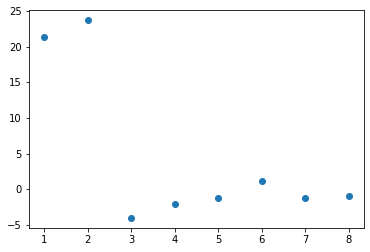

In [12]:
################
### Task 3 a ###
################

def TE(coef):                                # Function TE(vec) computs the training error of a polynomial with coeficients in vec
    n = 0                                    # Order of the term
    e = 0                                    # Error
    for x in x1:                             # Loop in datapoints
        e = e + (y1[n] - bfpP(coef,x)) ** 2  # Increment in Error
        n = n + 1                            # Increment in order
    return(e)                                # Returns the training error

nx      = np.arange(1,8.1,1)                                        # Suitable abscisas for the plot
bic     = np.zeros(8)                                               # Creates the array to store the BIC
bic[0]  = np.log(11) * 3  + 11 * np.log(2 * np.pi * TE(C01) / 11)   # BIC for Pol. of order 1
bic[1]  = np.log(11) * 4  + 11 * np.log(2 * np.pi * TE(C02) / 11)   # BIC for Pol. of order 2
bic[2]  = np.log(11) * 5  + 11 * np.log(2 * np.pi * TE(C03) / 11)   # BIC for Pol. of order 3
bic[3]  = np.log(11) * 6  + 11 * np.log(2 * np.pi * TE(C04) / 11)   # BIC for Pol. of order 4
bic[4]  = np.log(11) * 7  + 11 * np.log(2 * np.pi * TE(C05) / 11)   # BIC for Pol. of order 5
bic[5]  = np.log(11) * 8  + 11 * np.log(2 * np.pi * TE(C06) / 11)   # BIC for Pol. of order 6
bic[6]  = np.log(11) * 9  + 11 * np.log(2 * np.pi * TE(C07) / 11)   # BIC for Pol. of order 7
bic[7]  = np.log(11) * 10 + 11 * np.log(2 * np.pi * TE(C08) / 11)   # BIC for Pol. of order 8

plt.scatter(nx,bic)                                                 # Scattered plot of the error


In [8]:
print(np.log(2 * np.pi))

1.8378770664093453
